# Week 3

In [6]:
#importing the pandas library to handle the dataframe
import pandas as pd

In [9]:
#Read the file into a DataFrame called titanic using the pandas library and print out the first 5 rows.
titanic = pd.read_csv('titanic.csv')
titanic.head()
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
348,1,3,male,3.0,1,1,15.9000,S,Third,child,False,NaN,Southampton,yes,False
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True
405,0,2,male,34.0,1,0,21.0000,S,Second,man,True,NaN,Southampton,no,False
558,1,1,female,39.0,1,1,79.6500,S,First,woman,False,E,Southampton,yes,False
155,0,1,male,51.0,0,1,61.3792,C,First,man,True,NaN,Cherbourg,no,False


In [13]:
titanic.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
titanic.shape

(891, 15)

In [12]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#Calculates average age by class
df = titanic.groupby('class')['age'] #Works for single group aggregation
df.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

# 1. Data Aggregation
## 1.1 Multiple aggregation operations

In [17]:
"""
Oftentimes we'd like to compute multiple aggregation operations at the same time. Here is
an example where we compute statistics on multiple columns at once. (Note that you could
also use the method to compute different aggregation functions on the same column of
data.)"""



"\nOftentimes we'd like to compute multiple aggregation operations at the same time. Here is\nan example where we compute statistics on multiple columns at once. (Note that you could\nalso use the method to compute different aggregation functions on the same column of\ndata.)"

In [21]:
fun = {'who':'count','age':'mean'}


In [22]:
groupbyClass = titanic.groupby('class').agg(fun)
groupbyClass

,who,age
class,,
First,216,38.233441
Second,184,29.877630
Third,491,25.140620


In [23]:
"""Have a look at the output, which has now been grouped by passenger class. Which class
had the most passengers and which one had the oldest passengers on average?
"""

"""third class had most passengers, first class had highest average age"""

'third class had most passengers, first class had highest average age'

In [25]:
"""Do note that the columns seem to have 2 levels and also we have not renamed the columns.
Let’s try to do this in one single operation, using the renaming() function and to flatten the
columns, we reset the index."""

groupbyClass = titanic.groupby('class').agg(fun)
groupbyClass.rename(
columns={"who":"passengers", "age":"average age"},
inplace = True
)
groupbyClass = groupbyClass.reset_index()
groupbyClass

,class,passengers,average age
0,First,216,38.233441
1,Second,184,29.877630
2,Third,491,25.140620


**Practice 1a: Modify the aggregation operation 'fun' above so that it also finds the age of the
oldest and youngest passengers in each class. Note that all aggregate operations being
applied to the same column need to be placed within the same set of curly braces '{}' and
separated by commas ','. So fill in the [MISSING] parts of the function and also attempt to
rename the columns:**

In [27]:
fun2 = {'who':'count','age':{'mean', 'max', 'min'}}
groupbyClass2 = titanic.groupby('class').agg(fun2)
# It’s incomplete, add in the renaming here (or later)
groupbyClass2

who   age                 
       count   max   min       mean
class                              
First    216  80.0  0.92  38.233441
Second   184  70.0  0.67  29.877630
Third    491  74.0  0.42  25.140620

**Practice 1b: So was the oldest passenger traveling in 'first', 'second' or 'third' class?**

In [29]:
"""Was travelling in first class"""

'Was travelling in first class'

In [31]:
groupbyClass2 = groupbyClass2.reset_index()
# turn 'class' groups into column values
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
# drop the top level in the column hierarchy
groupbyClass2


ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [32]:
groupbyClass2.rename(columns = {'':'class'},inplace = True)
# rename the first column to be 'class'
groupbyClass2

,index,class,count,max,min,mean
0,0,First,216,80.0,0.92,38.233441
1,1,Second,184,70.0,0.67,29.877630
2,2,Third,491,74.0,0.42,25.140620


In [34]:
groupbyClass2['class']

0     First
1    Second
2     Third
Name: class, dtype: object

## 1.2 Custom aggregation operations

In [36]:
my_list = (80,20,64,19,56,12,88)
sum(e>50 for e in my_list)


4

In [37]:
fun3 = {'age':{'nunique',lambda x: sum(e>50 for e in x)}}

In [38]:
groupbyClass3 = titanic.groupby('class').agg(fun3).reset_index()
# turn groups into column values
groupbyClass3.columns = groupbyClass3.columns.droplevel(0)
# drop the top level in column hierarchy
groupbyClass3.rename(
columns = {
'':'class',
'nunique':'unique age count',
'<lambda_0>':'over 50s count'},
inplace = True
)
groupbyClass3
# print out the table

,class,over 50s count,unique age count
0,First,39,57
1,Second,15,57
2,Third,10,68


**Practice 2: Interpret the output and discuss your findings with other students.**

unique age is the count for unique ages, over 50s count is the number of age over 50

## 2. Data Visualization

In [40]:
import matplotlib.pyplot as plt


In [41]:
%matplotlib inline

### 2.1 Basic Plots

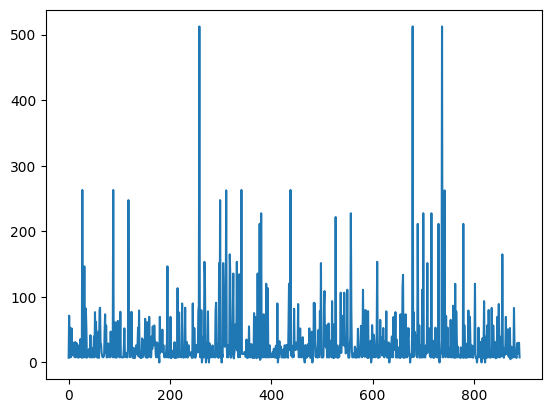

In [42]:
plt.plot(titanic.fare)
plt.show()

**Practice 3: How many passengers were there in total?**

about 900 

In [43]:
titanic.fare.count()

891

### 2.2 Histogram

(0.0, 300.0)

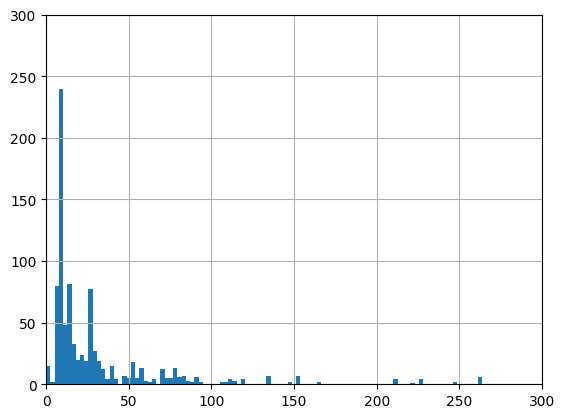

In [45]:
titanic.fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300) # setting limit on x-axis
plt.ylim(0,300) # setting limit on y-axis

**Practice 4: Reduce the x-axis limit to see how much most people paid to go on the titanic.
Approximately how many people paid 10 or less?**

(0.0, 300.0)

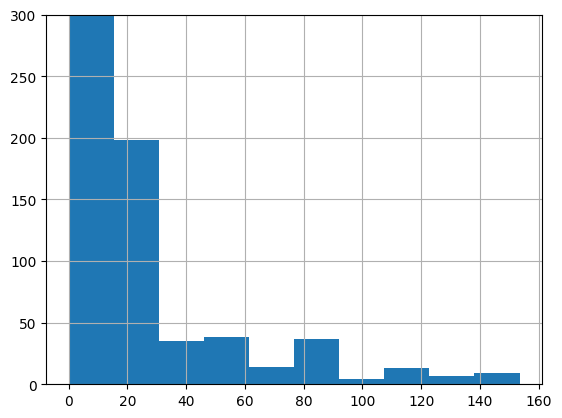

In [71]:
titanic.fare.hist(bins = 10) # try different numbers of bins
plt.ylim(0,300) # setting limit on y-axis


most people paid 10. 60 people or so paid less than 10 so 300 paid 10 or less

## 2.3 Boxplot

(0.0, 600.0)

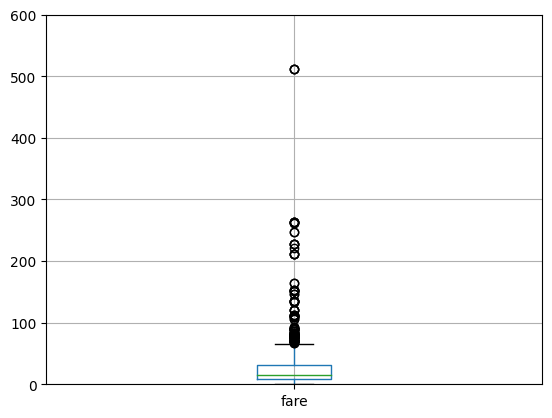

In [47]:
titanic.boxplot(column = 'fare')
plt.ylim(0, 600) # setting limit on y-axis

(0.0, 600.0)

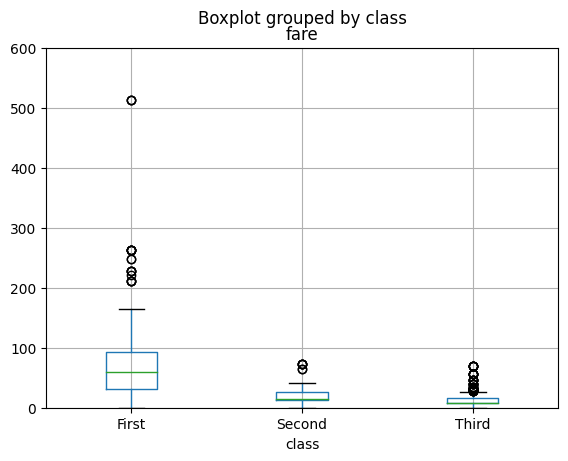

In [48]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

(0.0, 600.0)

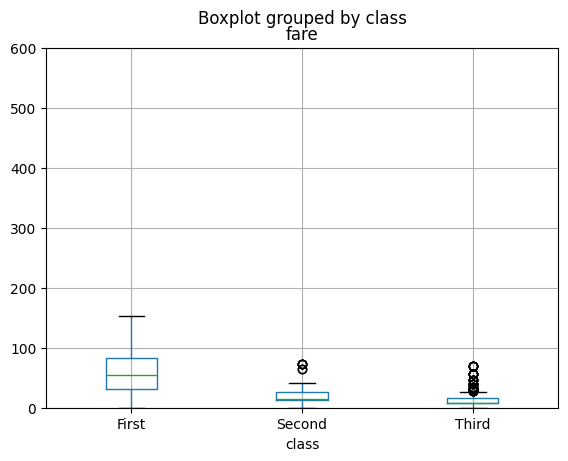

In [49]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)


**Practice 5: Use the same technique to filter out values greater than 50 for the second class
and 30 for the third class. Plot the boxplot, and observe the graph. What is the median price
for each class? Hint: set a lower y-axis limit to see clearer.**

(0.0, 600.0)

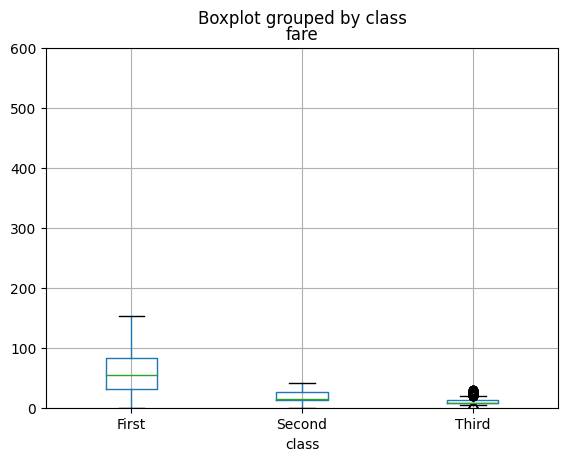

In [51]:
filt = ~((titanic['class'] == 'Second') & (titanic['fare'] > 50))
titanic = titanic[filt]
filt = ~((titanic['class'] == 'Third') & (titanic['fare'] > 30))
titanic = titanic[filt]

titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

50 for first, 10 for second,5 for third

**Practice 6a: Fill in the missing code to make the aggregation function below count the
number of children (age under 18) and adults (age 18 or over) in the different classes**

In [56]:
# Tutorial on Moodle uses lambda functions, I am using a normal
# function here in case you feel “challenged” by the lambda function :)
fun_child_adult = {'age':{lambda x: sum(e<18 for e in x), lambda x: sum(e>=18 for e in x)}}
groupbyClass2 = titanic.groupby('class').agg(fun_child_adult)
groupbyClass2
# The column names will be meaningless, so you may want to rename them.
groupbyClass2.rename(
columns = {
'<lambda_0>':'child count',
'<lambda_1>':'adult count'
},
inplace = True)
groupbyClass2

age            
       child count adult count
class                         
First           11         155
Second          23         143
Third           58         266

In [57]:
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2

,child count,adult count
class,,
First,11,155
Second,23,143
Third,58,266


**Practice 6b: Now follow the steps from Section 2.2 to group the 'titanic' data by class, and
apply the above aggregation function to it. Call the resulting DataFrame 'groupbyClass2' and
display it:**

In [62]:
groupbyClass2 = titanic.groupby('class').agg(fun_child_adult).reset_index()
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2.rename(
columns = {
'<lambda_0>':'child count',
'<lambda_1>':'adult count'},
inplace = True
)
groupbyClass2

,,child count,adult count
0,First,11,155
1,Second,23,143
2,Third,58,266


KeyError: 'class'

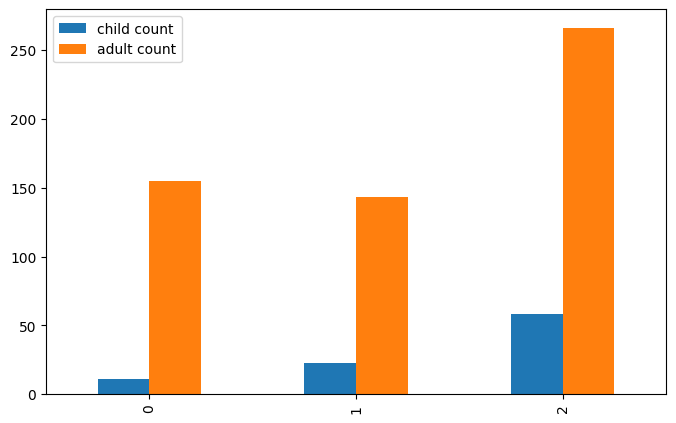

In [64]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
# figsize sets size of plot
ax.set_xticklabels(groupbyClass2['class'],rotation=45)
# use values of column 'class' as the x axis labels. Remove this line
#of code to see what will happen if we do not have this line
plt.xlabel('Ticket Class')
# setting a label for x axis
plt.ylabel('Number of Passengers(child or adult)')
# Setting a label for y axis
plt.title('Passengers ticket class based on their adulthood')
# Setting the title of chart

**Practice 7: So which class had the most families do you think?**

second or third class might have the most families

## 2.6 Pie Chart

**Practice 8: Use the groupbyClass2 below to plot a pie chart, showing the number of children in
each passenger class ('child count' column).**

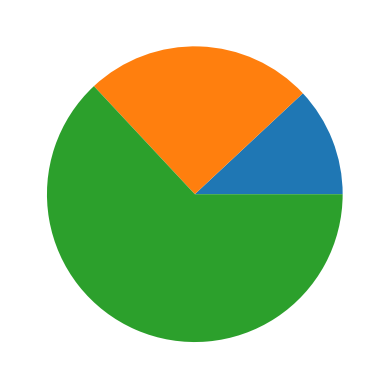

In [67]:
plt.pie(groupbyClass2['child count'])
plt.show()

**When should we use a Pie chart?**

clear comparison from the total

### 2.7 Scatter Plot

In [69]:
df = pd.DataFrame({
'Name' :
['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pat','Robert','David'],
'Age' : [39,28,44,25,32,33,31,26,22,25,28],
'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]
})
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pat,22,557
9,Robert,25,1030


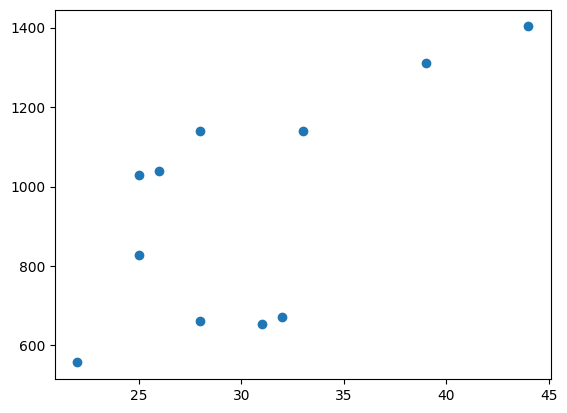

In [70]:
plt.scatter(df['Age'], df['Runs'])
plt.show()

**Practice 9: We now have two views of the same data, the table (DataFrame) view and the
plot. What information do you gain/lose in these different views? When should we use a scatter plot?**

You lose the names

but it becomes easier to see general trends and compare values